In [35]:
import tensorflow as tf

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import ReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('Dataset_Creation/Dataset.csv', index_col=0)


In [37]:
X = df.iloc[:, :100*100].values.reshape(-1, 100, 100, 1)
y = df.iloc[:, -1].values

In [38]:
X.shape, y.shape
num_classes = 3

In [39]:
y
y = to_categorical(y, num_classes= 1+ df.loc[:, 'class'].unique().shape[0])

In [40]:
X

array([[[[ 70],
         [ 63],
         [ 69],
         ...,
         [188],
         [186],
         [ 60]],

        [[ 71],
         [ 67],
         [ 75],
         ...,
         [187],
         [184],
         [ 65]],

        [[ 71],
         [ 71],
         [ 74],
         ...,
         [188],
         [185],
         [ 71]],

        ...,

        [[209],
         [208],
         [207],
         ...,
         [197],
         [197],
         [208]],

        [[209],
         [208],
         [207],
         ...,
         [197],
         [197],
         [209]],

        [[209],
         [209],
         [207],
         ...,
         [197],
         [197],
         [  1]]],


       [[[ 70],
         [ 63],
         [ 69],
         ...,
         [188],
         [186],
         [ 60]],

        [[ 71],
         [ 67],
         [ 75],
         ...,
         [187],
         [184],
         [ 65]],

        [[ 71],
         [ 71],
         [ 74],
         ...,
         [188],
         [

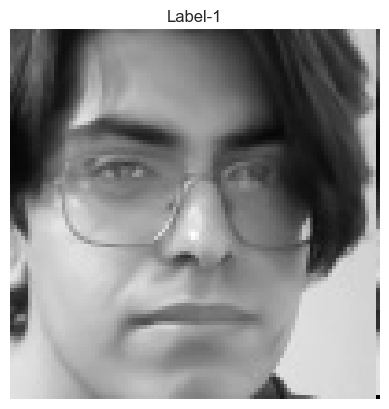

(1045, 5)


In [7]:
q = np.random.randint(19)
plt.imshow(X[q][:,:,0], cmap='gray')
plt.title(f'Label-{np.argmax(y[q])}')
plt.axis('off')
plt.show()
print(y.shape)


In [8]:
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=42, test_size=0.15)

print(f'Train Size - {X_train.shape}\nTest Size - {X_test.shape}')
print(y_train.shape)

Train Size - (888, 100, 100, 1)
Test Size - (157, 100, 100, 1)
(888, 5)


In [41]:
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=10,
                                   width_shift_range=0.25,
                                   height_shift_range=0.25,
                                   shear_range=0.1,
                                   zoom_range=0.25,
                                   horizontal_flip=False)

valid_datagen = ImageDataGenerator(rescale=1./255.)


In [42]:
from datetime import datetime 


In [43]:
noOfClasses = 3

In [44]:
# dataGen = ImageDataGenerator(width_shift_range=0.1,
#                             height_shift_range=0.1,
#                             zoom_range= 0.1,
#                             rotation_range= 10)
#
# dataGen.fit(X_train)
#
# y_train = to_categorical(y_train,noOfClasses)
# y_test = to_categorical(y_test,noOfClasses)
# #y_validation = to_categorical(y_validation,noOfClasses)
#
# model = Sequential()
# model.add(Conv2D(input_shape = (100,100,1), filters = 8, kernel_size = (5,5),activation = "relu", padding = "same" ))
# model.add(MaxPooling2D(pool_size = (2,2)))
#
# model.add(Conv2D(filters = 8, kernel_size = (3,3),activation = "relu", padding = "same" ))
# model.add(MaxPooling2D(pool_size = (2,2)))
#
# model.add(Dropout(0.2))
# model.add(Flatten())
# model.add(Dense(units = 256, activation = "relu"))
# model.add(Dropout(0.2))
# model.add(Dense(units = 4, activation = "softmax"))
#
# model.compile(loss = "categorical_crossentropy", optimizer=("Adam"), metrics = ["accuracy"])
#
# batch_size = 250
#
# hist = model.fit_generator(dataGen.flow(X_train, y_train, batch_size = batch_size),
#                                       validation_data = (X_test, y_test),
#                                       epochs = 15, steps_per_epoch = X_train.shape[0]//batch_size, shuffle = 1)

In [45]:

num_classes = 4
model_name = 'Face_trained_model_'+datetime.now().strftime("%H_%M_%S_")

In [46]:
model = Sequential(name = model_name)

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(100, 100, 1)))
model.add(BatchNormalization()) #----------------
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization()) #----------------
model.add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
model.add(BatchNormalization()) #----------------
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2)) #----------------

model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=5, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "Face_trained_model_00_10_24_"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 98, 98, 64)        640       
                                                                 
 batch_normalization_9 (Bat  (None, 98, 98, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_8 (Conv2D)           (None, 96, 96, 64)        36928     
                                                                 
 batch_normalization_10 (Ba  (None, 96, 96, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_9 (Conv2D)           (None, 96, 96, 64)        102464    
                                                                 
 batch_normalization_11 (Ba  (None, 96

In [47]:

learning_rate = 0.001
optimizer = RMSprop(learning_rate=learning_rate)

model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [48]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=200,
                                            verbose=1,
                                            factor=0.2)

ch = ModelCheckpoint('models/'+model_name+'.h5', monitor='val_acc', verbose=0, save_best_only=True, mode='max')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=200)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/"+datetime.now().strftime("%Y%m%d-%H%M%S"))


In [49]:
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=10,
                                   width_shift_range=0.25,
                                   height_shift_range=0.25,
                                   shear_range=0.1,
                                   zoom_range=0.25,
                                   horizontal_flip=False)

valid_datagen = ImageDataGenerator(rescale=1./255.)

In [50]:

X_train = X_train.reshape(-1,100,100,1)
X_test = X_test.reshape(-1,100,100,1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(888, 100, 100, 1)
(157, 100, 100, 1)
(157, 5)
(888, 5)


In [51]:
print(y_train)

[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [52]:
# model.compile(optimizer='rmsprop',
#     loss=None,
#     metrics=None,
#     loss_weights=None,
#     weighted_metrics=None,
#     run_eagerly=True,
#     steps_per_execution=None,
#     jit_compile=None,)

In [53]:

tf.config.run_functions_eagerly(False)



In [54]:
epochs = 5
batch_size = 256
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch= X_train.shape[0]//batch_size,
                              epochs=epochs,
                              validation_data=valid_datagen.flow(X_test, y_test),
                              validation_steps=50,
                              verbose = 1,
                              callbacks=[learning_rate_reduction, es, ch, tensorboard_callback]
                            )

Epoch 1/5
3/3 [==============================] - ETA: 0s - loss: 2.0097 - accuracy: 0.4335WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 50 batches). You may need to use the repeat() function when building your dataset.


3/3 [==============================] - 37s 11s/step - loss: 2.0097 - accuracy: 0.4335 - val_loss: 32.4490 - val_accuracy: 0.1847 - lr: 0.0010
Epoch 2/5
3/3 [==============================] - ETA: 0s - loss: 1.1781 - accuracy: 0.7104WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


3/3 [==============================] - 34s 10s/step - loss: 1.1781 - accuracy: 0.7104 - lr: 0.0010
Epoch 3/5
3/3 [==============================] - ETA: 0s - loss: 0.1067 - accuracy: 0.9727 WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


3/3 [==============================] - 42s 14s/step - loss: 0.1067 - accuracy: 0.9727 - lr: 0.0010
Epoch 4/5
3/3 [==============================] - ETA: 0s - loss: 0.0416 - accuracy: 0.9935 WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


3/3 [==============================] - 41s 14s/step - loss: 0.0416 - accuracy: 0.9935 - lr: 0.0010
Epoch 5/5
3/3 [==============================] - ETA: 0s - loss: 0.0258 - accuracy: 0.9961 WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


3/3 [==============================] - 42s 14s/step - loss: 0.0258 - accuracy: 0.9961 - lr: 0.0010


In [55]:
loss, acc = model.evaluate(valid_datagen.flow(X_test, y_test))

print(f'Loss: {loss}\nAccuracy: {acc*100}')

5/5 [==============================] - 3s 541ms/step - loss: 6.1448 - accuracy: 0.2739
Loss: 6.144783973693848
Accuracy: 27.38853394985199


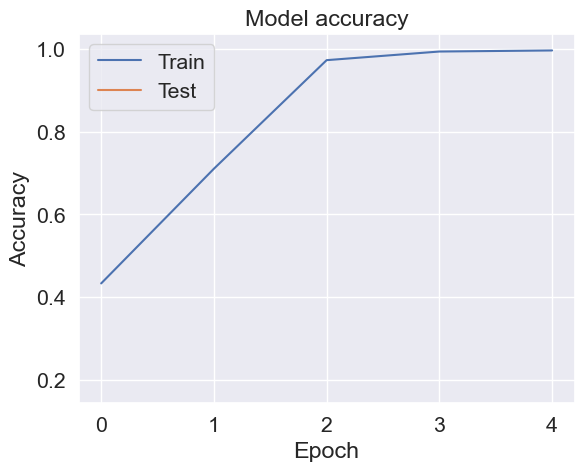

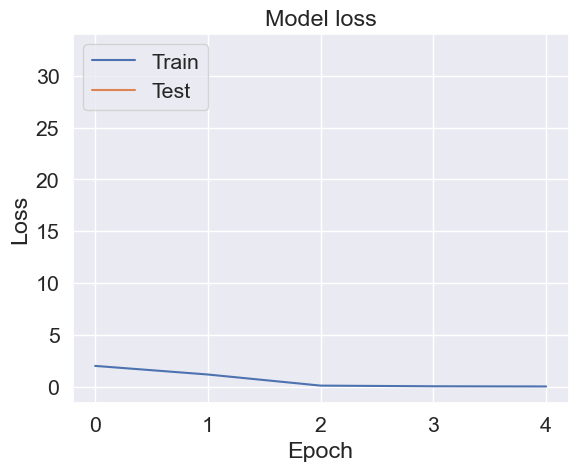

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & test loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [57]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
%tensorboard --logdir logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Launching TensorBoard...

In [58]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test),axis=1)))

5/5 [==============================] - 3s 597ms/step
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        39
           2       0.27      1.00      0.42        42
           3       0.00      0.00      0.00        43
           4       0.00      0.00      0.00        33

    accuracy                           0.27       157
   macro avg       0.07      0.25      0.11       157
weighted avg       0.07      0.27      0.11       157


/Users/manideep/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manideep/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manideep/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5/5 [==============================] - 3s 537ms/step


<Axes: xlabel='Predicted', ylabel='Actual'>

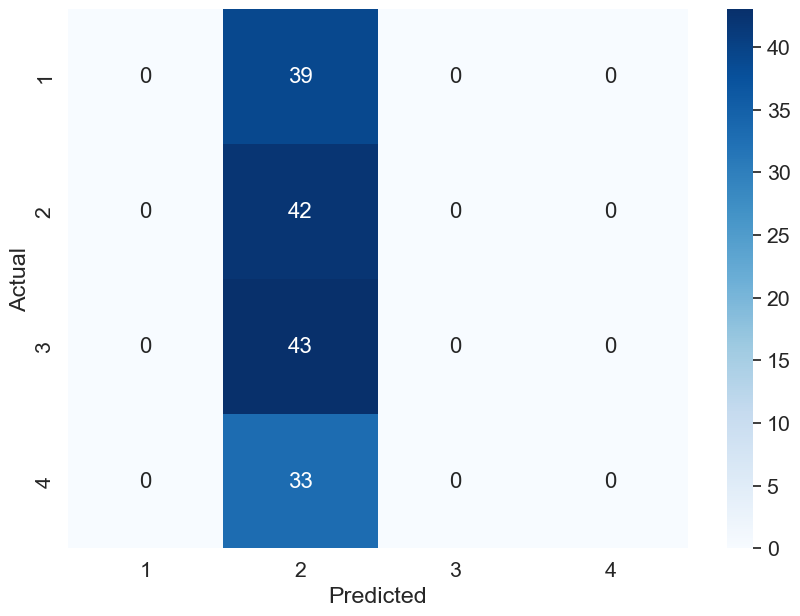

In [59]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score, recall_score
import seaborn as sn
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(X_test), axis=1)
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [60]:
print(f1_score(y_true, y_pred, average="macro")*100)
print(precision_score(y_true, y_pred, average="macro")*100)
print(recall_score(y_true, y_pred, average="macro")*100)

10.552763819095476
6.687898089171974
25.0


/Users/manideep/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


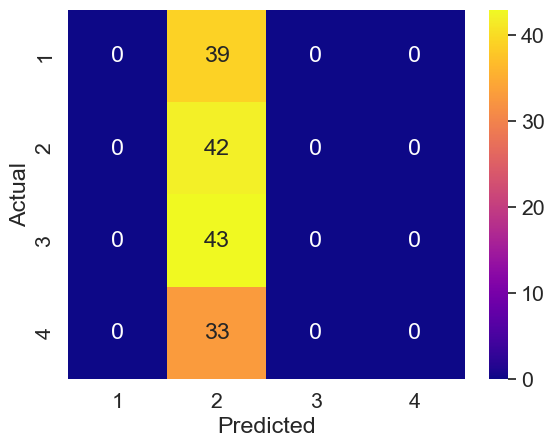

In [61]:
sn.heatmap(df_cm, annot=True, fmt="d", cmap="plasma");


In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
def AA_andEachClassAccuracy(confusion_matrix):
    from operator import truediv
    counter = confusion_matrix.shape[0]
    list_diag = np.diag(confusion_matrix)
    list_raw_sum = np.sum(confusion_matrix, axis=1)
    each_acc = np.nan_to_num(truediv(list_diag, list_raw_sum))
    average_acc = np.mean(each_acc)
    return each_acc, average_acc

def reports (nn_model, X_test,y_test):
    #start = time.time()
    Y_pred = nn_model.predict(X_test)
    y_pred = np.argmax(Y_pred, axis=1)
    #end = time.time()
    #print(end - start

    classification = classification_report(np.argmax(y_test, axis=1), y_pred, target_names=['1', '2','3','4'])
    target_names=['1', '2','3','4']
    oa = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    confusion = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
    each_acc, aa = AA_andEachClassAccuracy(confusion)
    kappa = cohen_kappa_score(np.argmax(y_test, axis=1), y_pred)
    score = nn_model.evaluate(X_test, y_test, batch_size=32)
    Test_Loss =  score[0]
    Test_accuracy = score[1]*100

    return classification, confusion, Test_Loss, Test_accuracy, oa*100, '\n'.join([' : '.join(map(str, i)) for i in zip(target_names, each_acc*100)]), aa*100, kappa*100



classification, confusion, Test_loss, Test_accuracy, oa, each_acc, aa, kappa = reports(model, X_test, y_test)
classification = str(classification)
confusion = str(confusion)
file_name = "Face_Classification_report.txt"

with open(file_name, 'w') as x_file:
    x_file.write('\nTest loss: {}%'.format(Test_loss))
    x_file.write('\n')
    x_file.write('Test accuracy: {}%'.format(Test_accuracy))
    x_file.write('\n')
    x_file.write('\n')
    x_file.write('Kappa accuracy: {}%'.format(kappa))
    x_file.write('\n')
    x_file.write('Overall accuracy: {}%'.format(oa))
    x_file.write('\n')
    x_file.write('Average accuracy: {}%'.format(aa))
    x_file.write('\n\n')
    x_file.write('Classwise Accuracy: \n{}'.format(each_acc))
    x_file.write('\n\n')
    x_file.write('Classification Report:\n{}'.format(classification))
    x_file.write('\n\n')
    x_file.write('Confusion Matrix:\n{}'.format(confusion))

5/5 [==============================] - 3s 554ms/step


/Users/manideep/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manideep/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manideep/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5/5 [==============================] - 3s 538ms/step - loss: 2711.2688 - accuracy: 0.2675


1/1 [==============================] - 0s 33ms/step


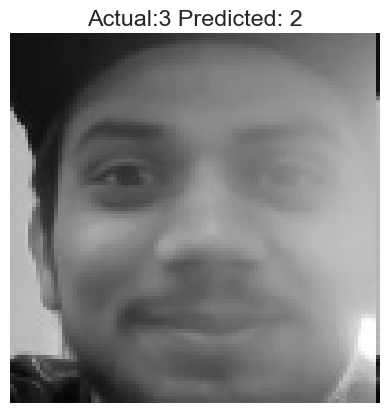

In [63]:
# Verify
rand_n = np.random.randint(X_test.shape[0])
plt.imshow(X_test[rand_n][:, :, 0], cmap='gray')
plt.title(f'Actual:{np.argmax(y_test[rand_n])} Predicted: {np.argmax(model.predict(X_test[rand_n].reshape(-1, 100, 100, 1)))}');
plt.axis('off')
plt.show()

In [64]:
def plot_predictions(r=5 ,c =5):
  w=10
  h=10
  fig=plt.figure(figsize=(12, 12))
  columns = c
  rows = r
  for i in range(1, columns*rows +1):
      fig.add_subplot(rows, columns, i)
      rand_n = np.random.randint(X_test.shape[0])
      plt.imshow(X_test[rand_n][:, :, 0], cmap='gray')
      plt.title(f'Actual:{np.argmax(y_test[rand_n])} Predicted: {np.argmax(model.predict(X_test[rand_n].reshape(-1, 100, 100, 1)))}');
      plt.axis('off')
  plt.show()

1/1 [==============================] - 0s 36ms/step


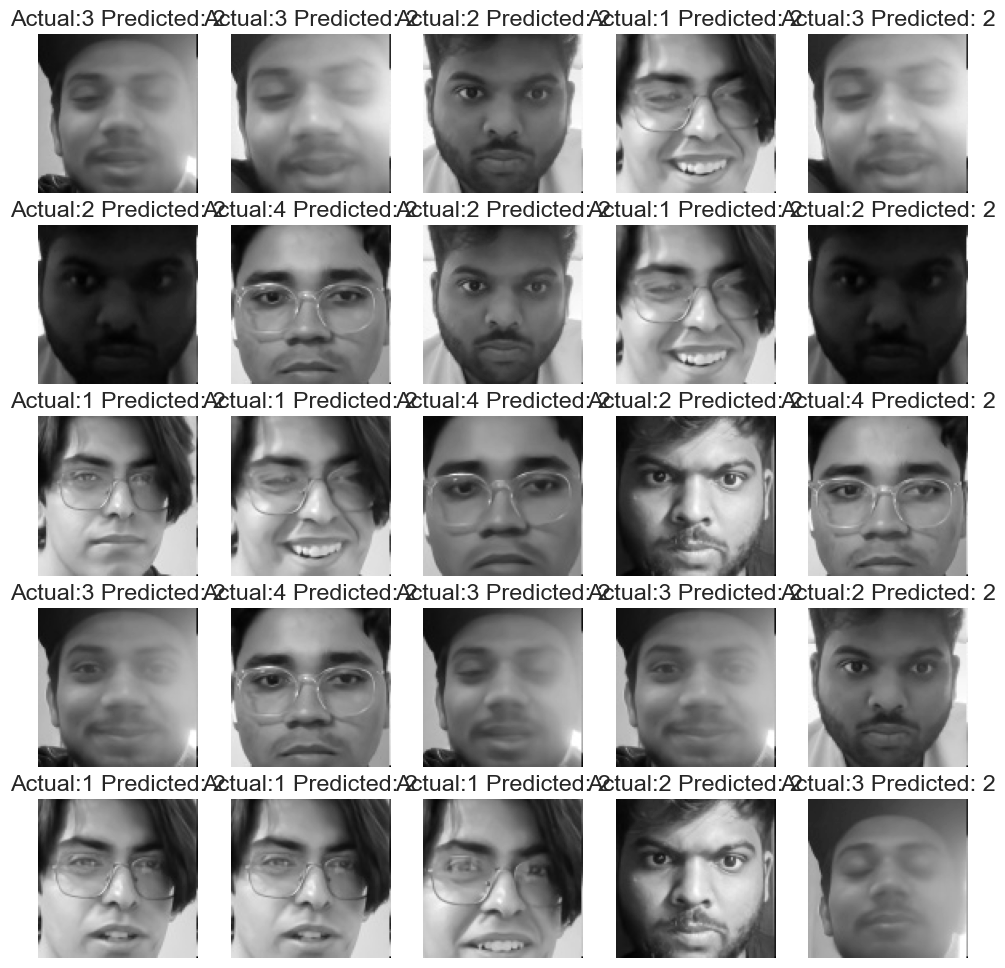

In [65]:
plot_predictions()

In [34]:
# serialize weights to HDF5
model.save(model_name+".h5")
print("Model Saved to disk")

Model Saved to disk


/Users/manideep/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
